In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
housing_costs_data = Path("Resources/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
df = pd.read_csv(housing_costs_data)
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30
0,102001,0,United States,country,NaN,122659.350322,122875.147441,123142.767643,123716.760444,124377.357342,...,349190.673082,350832.176062,352072.339045,353000.359455,353657.789184,354094.080368,354528.246331,355323.889483,356871.247675,358734.373045
1,394913,1,"New York, NY",msa,NY,217008.362117,217930.525215,218861.229206,220747.195629,222700.179171,...,622174.680744,625487.220773,628224.915278,630581.407730,632902.992741,635677.711949,638574.030552,642628.523197,648046.643049,654171.531013
2,753899,2,"Los Angeles, CA",msa,CA,230633.417032,231491.665968,232634.845367,234909.388347,237397.025296,...,907263.197452,921408.638417,935691.221437,947574.450673,956517.236818,962132.874892,962293.150058,959211.285596,958045.663058,961667.108976
3,394463,3,"Chicago, IL",msa,IL,153976.495500,154119.032880,154390.497831,155065.835165,155878.184747,...,304700.854754,307176.439602,309021.569193,310395.312821,311315.936120,311954.701155,312619.112292,314013.313090,316436.853154,319321.706031
4,394514,4,"Dallas, TX",msa,TX,128441.069684,128498.277785,128564.044354,128734.833225,128960.013675,...,377978.633210,378920.136620,379344.002990,379460.935805,379319.261203,378986.389660,379008.493258,379499.800362,380679.405570,381666.281275


In [3]:
date_columns = df.columns[5:]

for col in date_columns:
    df[col] = df[col].map('${:,.2f}'.format)

df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30
0,102001,0,United States,country,NaN,"$122,659.35","$122,875.15","$123,142.77","$123,716.76","$124,377.36",...,"$349,190.67","$350,832.18","$352,072.34","$353,000.36","$353,657.79","$354,094.08","$354,528.25","$355,323.89","$356,871.25","$358,734.37"
1,394913,1,"New York, NY",msa,NY,"$217,008.36","$217,930.53","$218,861.23","$220,747.20","$222,700.18",...,"$622,174.68","$625,487.22","$628,224.92","$630,581.41","$632,902.99","$635,677.71","$638,574.03","$642,628.52","$648,046.64","$654,171.53"
2,753899,2,"Los Angeles, CA",msa,CA,"$230,633.42","$231,491.67","$232,634.85","$234,909.39","$237,397.03",...,"$907,263.20","$921,408.64","$935,691.22","$947,574.45","$956,517.24","$962,132.87","$962,293.15","$959,211.29","$958,045.66","$961,667.11"
3,394463,3,"Chicago, IL",msa,IL,"$153,976.50","$154,119.03","$154,390.50","$155,065.84","$155,878.18",...,"$304,700.85","$307,176.44","$309,021.57","$310,395.31","$311,315.94","$311,954.70","$312,619.11","$314,013.31","$316,436.85","$319,321.71"
4,394514,4,"Dallas, TX",msa,TX,"$128,441.07","$128,498.28","$128,564.04","$128,734.83","$128,960.01",...,"$377,978.63","$378,920.14","$379,344.00","$379,460.94","$379,319.26","$378,986.39","$379,008.49","$379,499.80","$380,679.41","$381,666.28"


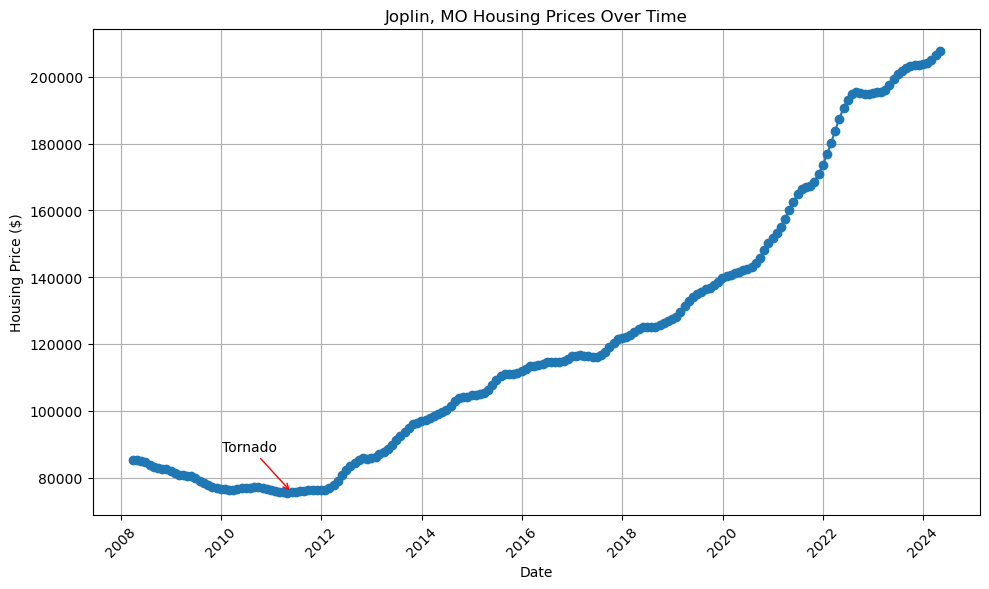

In [12]:
joplin_data = df[df['RegionName'] == 'Joplin, MO'].iloc[0, 5:]

dates = pd.to_datetime(joplin_data.index)
values = joplin_data.str.replace('$', '').str.replace(',', '').astype(float)

tornado_date = pd.to_datetime('2011-05-31')
tornado_index = dates.get_loc(tornado_date)

plt.figure(figsize=(10, 6))
plt.plot(dates, values, marker='o', linestyle='-')
plt.title('Joplin, MO Housing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Housing Price ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.annotate('Tornado', xy=(dates[tornado_index], values.iloc[tornado_index]), xytext = (-50, 30), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'))
plt.tight_layout()
plt.show()

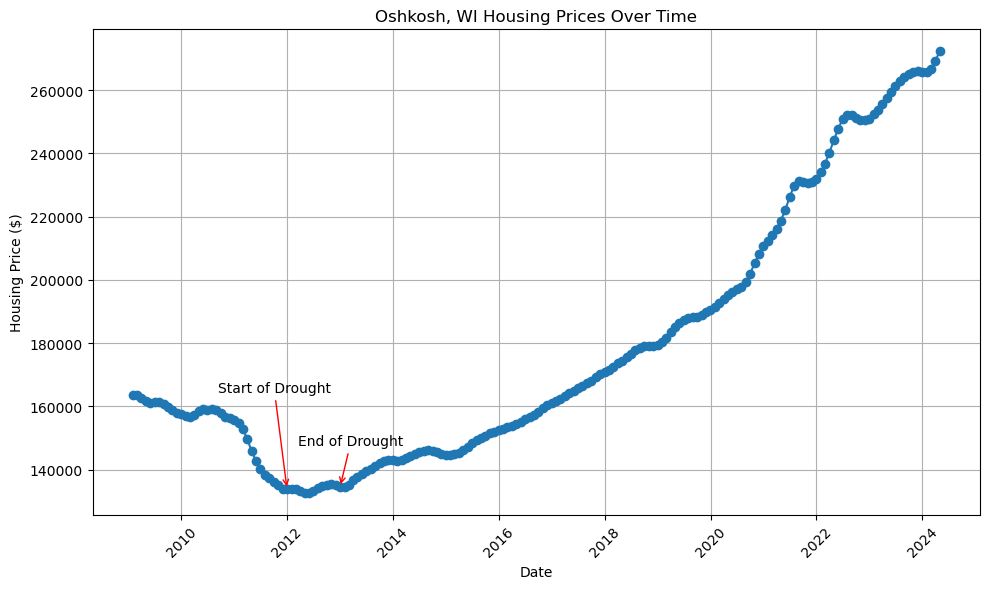

In [18]:
oshkosh_data = df[df['RegionName'] == 'Oshkosh, WI'].iloc[0, 5:]

dates = pd.to_datetime(oshkosh_data.index)
values = oshkosh_data.str.replace('$', '').str.replace(',', '').astype(float)

drought_begin_date = pd.to_datetime('2011-12-31')
drought_begin_index = dates.get_loc(drought_begin_date)
drought_end_date = pd.to_datetime('2012-12-31')
drought_end_index = dates.get_loc(drought_end_date)

plt.figure(figsize=(10, 6))
plt.plot(dates, values, marker='o', linestyle='-')
plt.title('Oshkosh, WI Housing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Housing Price ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.annotate('Start of Drought', xy=(dates[drought_begin_index], values.iloc[drought_begin_index]), xytext = (-50, 70), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'))
plt.annotate('End of Drought', xy=(dates[drought_end_index], values.iloc[drought_end_index]), xytext = (-30, 30), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'))
plt.tight_layout()
plt.show()

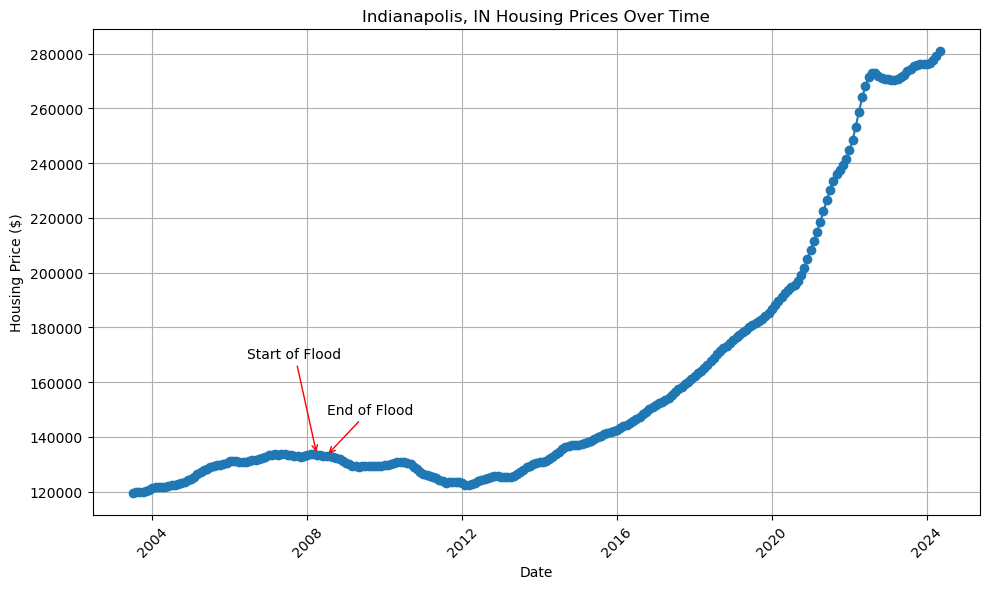

In [22]:
indianapolis_data = df[df['RegionName'] == 'Indianapolis, IN'].iloc[0, 5:]

dates = pd.to_datetime(indianapolis_data.index)
values = indianapolis_data.str.replace('$', '').str.replace(',', '').astype(float)

flood_begin_date = pd.to_datetime('2008-03-31')
flood_begin_index = dates.get_loc(flood_begin_date)
flood_end_date = pd.to_datetime('2008-06-30')
flood_end_index = dates.get_loc(flood_end_date)

plt.figure(figsize=(10, 6))
plt.plot(dates, values, marker='o', linestyle='-')
plt.title('Indianapolis, IN Housing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Housing Price ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.annotate('Start of Flood', xy=(dates[flood_begin_index], values.iloc[flood_begin_index]), xytext = (-50, 70), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'))
plt.annotate('End of Flood', xy=(dates[flood_end_index], values.iloc[flood_end_index]), xytext = (0, 30), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'))
plt.tight_layout()
plt.show()

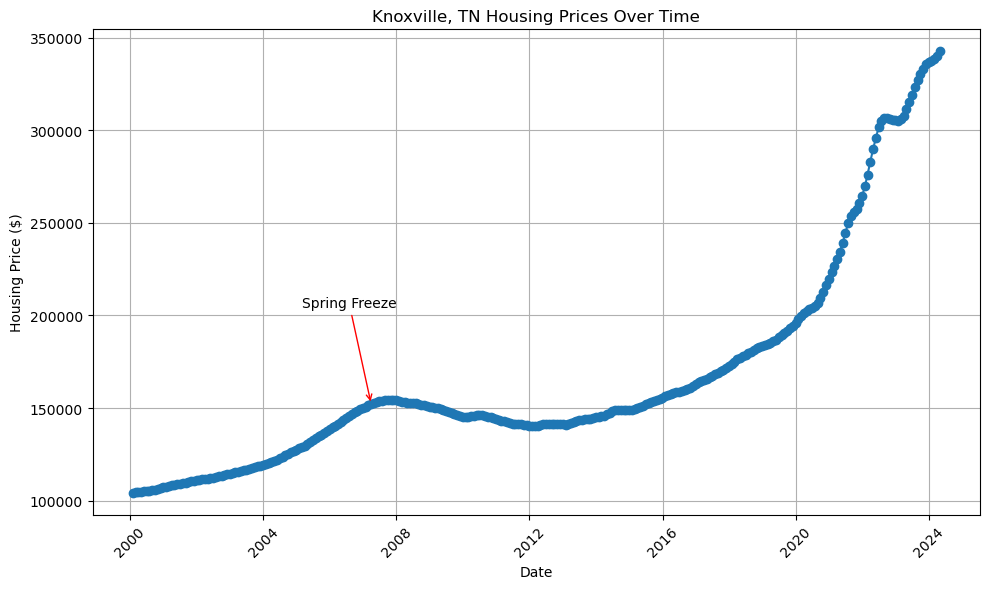

In [24]:
knoxville_data = df[df['RegionName'] == 'Knoxville, TN'].iloc[0, 5:]

dates = pd.to_datetime(knoxville_data.index)
values = knoxville_data.str.replace('$', '').str.replace(',', '').astype(float)

freeze_date = pd.to_datetime('2007-03-31')
freeze_index = dates.get_loc(freeze_date)

plt.figure(figsize=(10, 6))
plt.plot(dates, values, marker='o', linestyle='-')
plt.title('Knoxville, TN Housing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Housing Price ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.annotate('Spring Freeze', xy=(dates[freeze_index], values.iloc[freeze_index]), xytext = (-50, 70), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'))
plt.tight_layout()
plt.show()

#Freeze: 2007

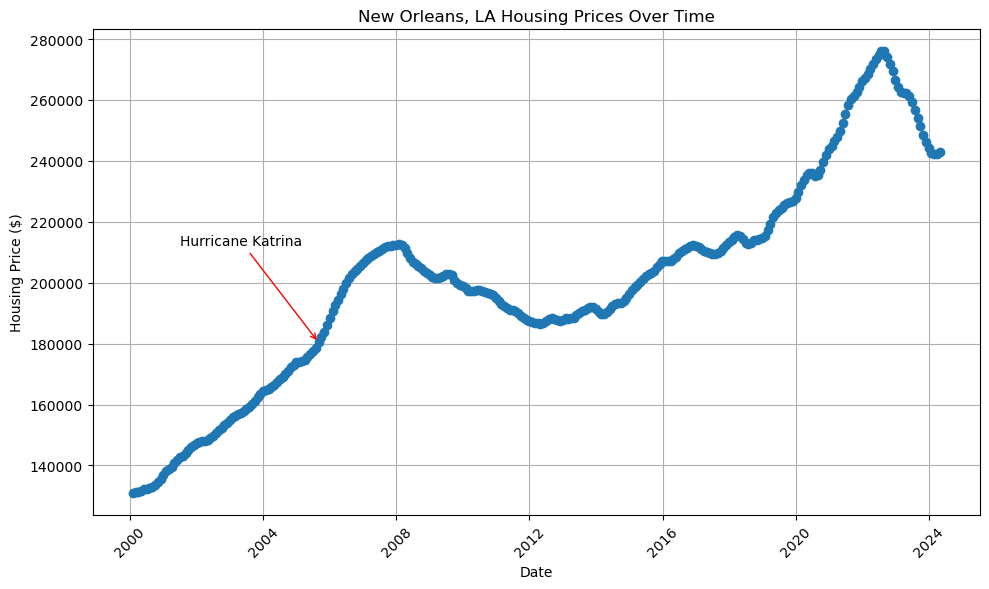

In [28]:
new_orleans_data = df[df['RegionName'] == 'New Orleans, LA'].iloc[0, 5:]

dates = pd.to_datetime(new_orleans_data.index)
values = new_orleans_data.str.replace('$', '').str.replace(',', '').astype(float)

hurricane_date = pd.to_datetime('2005-08-31')
hurricane_index = dates.get_loc(hurricane_date)

plt.figure(figsize=(10, 6))
plt.plot(dates, values, marker='o', linestyle='-')
plt.title('New Orleans, LA Housing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Housing Price ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.annotate('Hurricane Katrina', xy=(dates[hurricane_index], values.iloc[hurricane_index]), xytext = (-100, 70), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'))
plt.tight_layout()
plt.show()

#Hurricane Katrina: 2005

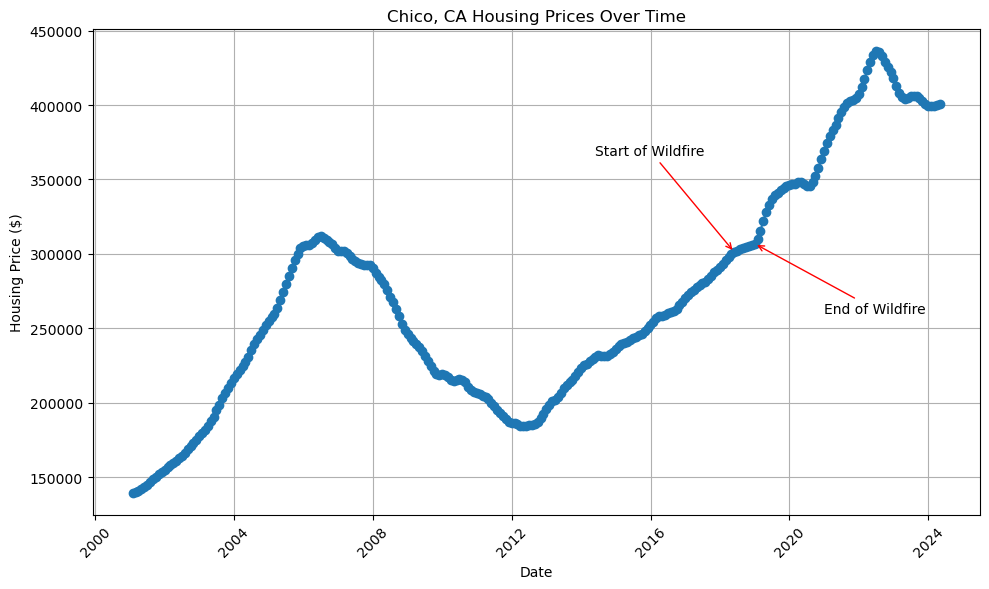

In [32]:
chico_data = df[df['RegionName'] == 'Chico, CA'].iloc[0, 5:]

dates = pd.to_datetime(chico_data.index)
values = chico_data.str.replace('$', '').str.replace(',', '').astype(float)

wildfire_begin_date = pd.to_datetime('2018-05-31')
wildfire_begin_index = dates.get_loc(wildfire_begin_date)
wildfire_end_date = pd.to_datetime('2018-12-31')
wildfire_end_index = dates.get_loc(wildfire_end_date)

plt.figure(figsize=(10, 6))
plt.plot(dates, values, marker='o', linestyle='-')
plt.title('Chico, CA Housing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Housing Price ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.annotate('Start of Wildfire', xy=(dates[wildfire_begin_index], values.iloc[wildfire_begin_index]), xytext = (-100, 70), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'))
plt.annotate('End of Wildfire', xy=(dates[wildfire_end_index], values.iloc[wildfire_end_index]), xytext = (50, -50), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'))
plt.tight_layout()
plt.show()

#Wildfire: 2018

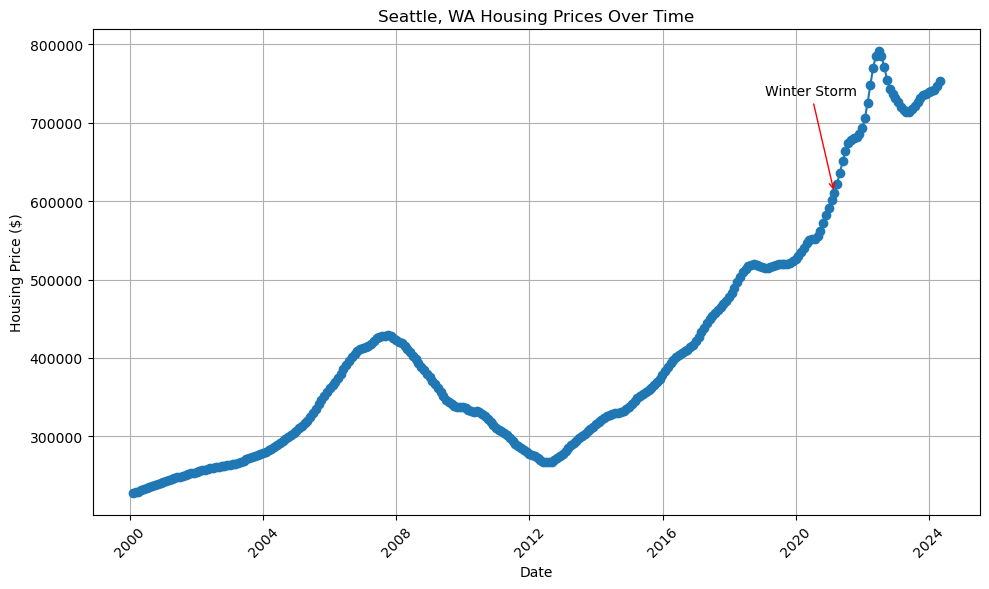

In [35]:
seattle_data = df[df['RegionName'] == 'Seattle, WA'].iloc[0, 5:]

dates = pd.to_datetime(seattle_data.index)
values = seattle_data.str.replace('$', '').str.replace(',', '').astype(float)

winter_storm_date = pd.to_datetime('2021-02-28')
winter_storm_index = dates.get_loc(winter_storm_date)


plt.figure(figsize=(10, 6))
plt.plot(dates, values, marker='o', linestyle='-')
plt.title('Seattle, WA Housing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Housing Price ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.annotate('Winter Storm', xy=(dates[winter_storm_index], values.iloc[winter_storm_index]), xytext = (-50, 70), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'))
plt.tight_layout()
plt.show()

#Winter storm: 2021